In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import choice
from scipy.ndimage import convolve

from schelling.objects import Agent, Grid
from schelling.plot import plot_agents, plot_satisfaction

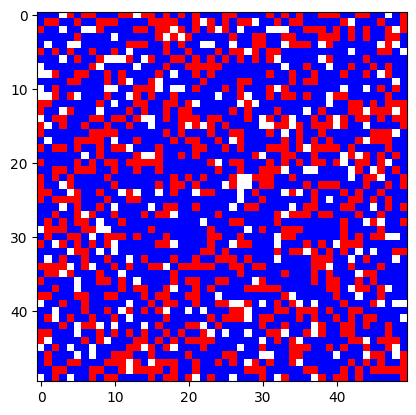

In [3]:
grid = Grid(size=50, threshold=0.01, vacancy_ratio=0.1, kind_ratio=0.65)
grid.create_agents()
grid.update_grid(grid.agents)
plot_agents(grid.grid)


In [4]:
satisfactions = []
for i in range(1000):
    grid.calculate_satisfaction()
    grid.move_agents()
    grid.update_grid(grid.agents)
    satisfactions.append(grid.overall_satisfaction)



/home/paucablop/git/home/simulation/schelling/objects.py:63: RuntimeWarning: divide by zero encountered in long_scalars
  kind_1_satisfaction[row, col] / kind_2_satisfaction[row, col]
/home/paucablop/git/home/simulation/schelling/objects.py:67: RuntimeWarning: divide by zero encountered in long_scalars
  kind_2_satisfaction[row, col] / kind_1_satisfaction[row, col]


TypeError: cannot unpack non-iterable numpy.int64 object

In [24]:
kind_1_grid = np.where(grid.grid == -1, 1, 0)
kind_2_grid = np.where(grid.grid == 1, 1, 0)

In [17]:
def point_convolution(matrix: np.ndarray, location: tuple[int, int], kernel: np.ndarray) -> np.ndarray:
    """Convolve a kernel with a matrix at a given location."""
    row, col = location
    kernel_size = kernel.shape[0]
    kernel_radius = kernel_size // 2
    row_start = row - kernel_radius
    row_end = row + kernel_radius + 1
    col_start = col - kernel_radius
    col_end = col + kernel_radius + 1
    return convolve(matrix[row_start:row_end, col_start:col_end], kernel, mode="reflect", cval=0)


In [ ]:
kernel = np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1]])
location = (1, 1)
matrix = grid.grid

In [25]:
kernel = np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1]])

point_convolution(kind_1_grid, (1, 1), kernel)
point_convolution(kind_2_grid, (1, 1), kernel)

array([[1, 2, 3],
       [3, 2, 2],
       [4, 4, 3]])

{1, 2, 3, 4}